 # Intelligent Property Analyser-

In [ ]:
#importing some necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error


In [ ]:
# Now we need load the dataset
df= pd.read_csv("E:/TCS ION PROJECT/Housing.csv")
# explore the dataset
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [39]:
df.shape

(545, 13)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [41]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [42]:
# Data Cleaning
print(df.isnull().sum())
print("Missing Values are :",df.isnull().values.any())
# Check for Duplicate values 
df[df.duplicated(keep=False)]

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64
Missing Values are : False


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus


Preprocessing the dataset

In [43]:
lb =LabelEncoder()
cat_data = ['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea']
for i in cat_data:
    df[i] = lb.fit_transform(df[i])
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [44]:
dms = pd.get_dummies(df[["furnishingstatus"]])
dms.head()

,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,1,0,0
1,1,0,0
2,0,1,0
3,1,0,0
4,1,0,0


In [45]:
df=pd.concat([df, dms], axis=1)
df.rename({'semi-furnished': 'semi_furnished'}, axis=1, inplace=True)
df.head(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished,1,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished,0,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished,1,0,0
5,10850000,7500,3,3,1,1,0,1,0,1,2,1,semi-furnished,0,1,0
6,10150000,8580,4,3,4,1,0,0,0,1,2,1,semi-furnished,0,1,0
7,10150000,16200,5,3,2,1,0,0,0,0,0,0,unfurnished,0,0,1
8,9870000,8100,4,1,2,1,1,1,0,1,2,1,furnished,1,0,0
9,9800000,5750,3,2,4,1,1,0,0,1,1,1,unfurnished,0,0,1


In [46]:
df=df.drop(['furnishingstatus'], axis=1)
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,0,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1,0,0


array([[<AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'area'}>,
        <AxesSubplot:title={'center':'bedrooms'}>,
        <AxesSubplot:title={'center':'bathrooms'}>],
       [<AxesSubplot:title={'center':'stories'}>,
        <AxesSubplot:title={'center':'mainroad'}>,
        <AxesSubplot:title={'center':'guestroom'}>,
        <AxesSubplot:title={'center':'basement'}>],
       [<AxesSubplot:title={'center':'hotwaterheating'}>,
        <AxesSubplot:title={'center':'airconditioning'}>,
        <AxesSubplot:title={'center':'parking'}>,
        <AxesSubplot:title={'center':'prefarea'}>],
       [<AxesSubplot:title={'center':'furnishingstatus_furnished'}>,
        <AxesSubplot:title={'center':'furnishingstatus_semi-furnished'}>,
        <AxesSubplot:title={'center':'furnishingstatus_unfurnished'}>,
        <AxesSubplot:>]], dtype=object)

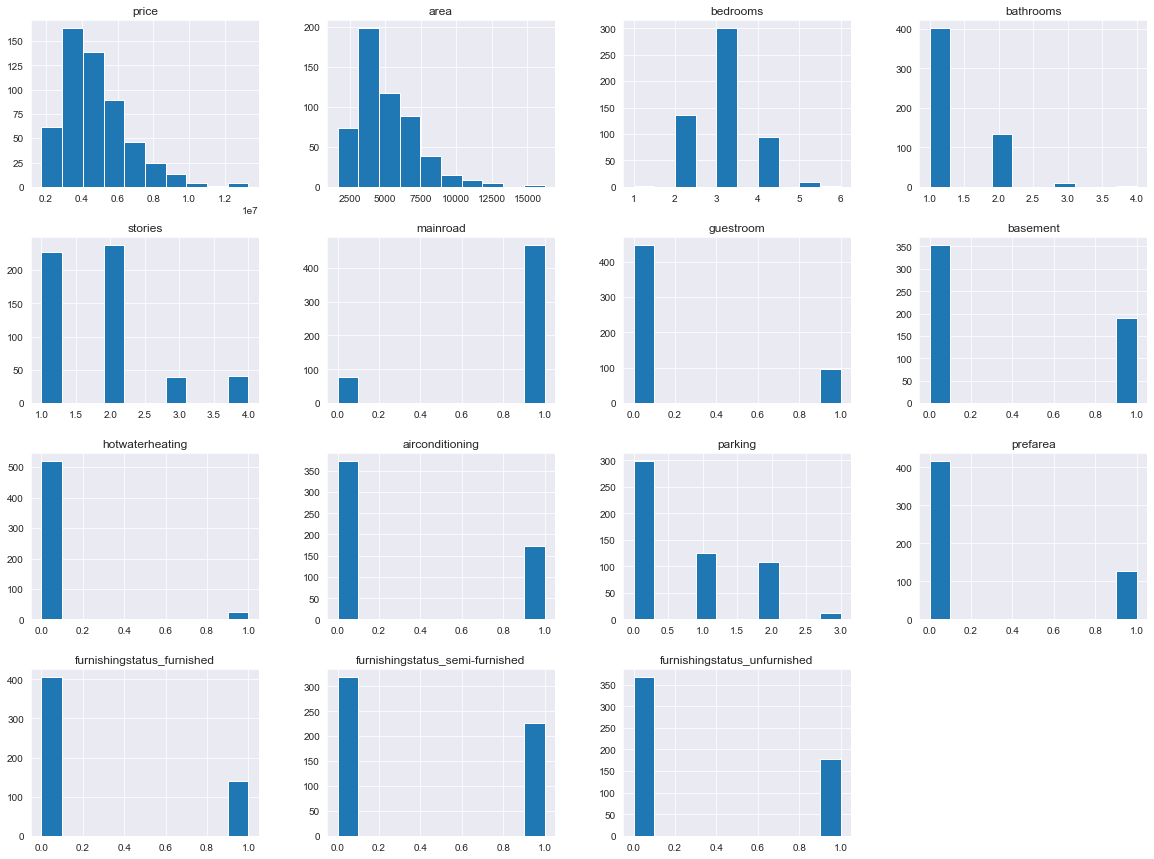

In [47]:
df.hist(figsize=(20,15))

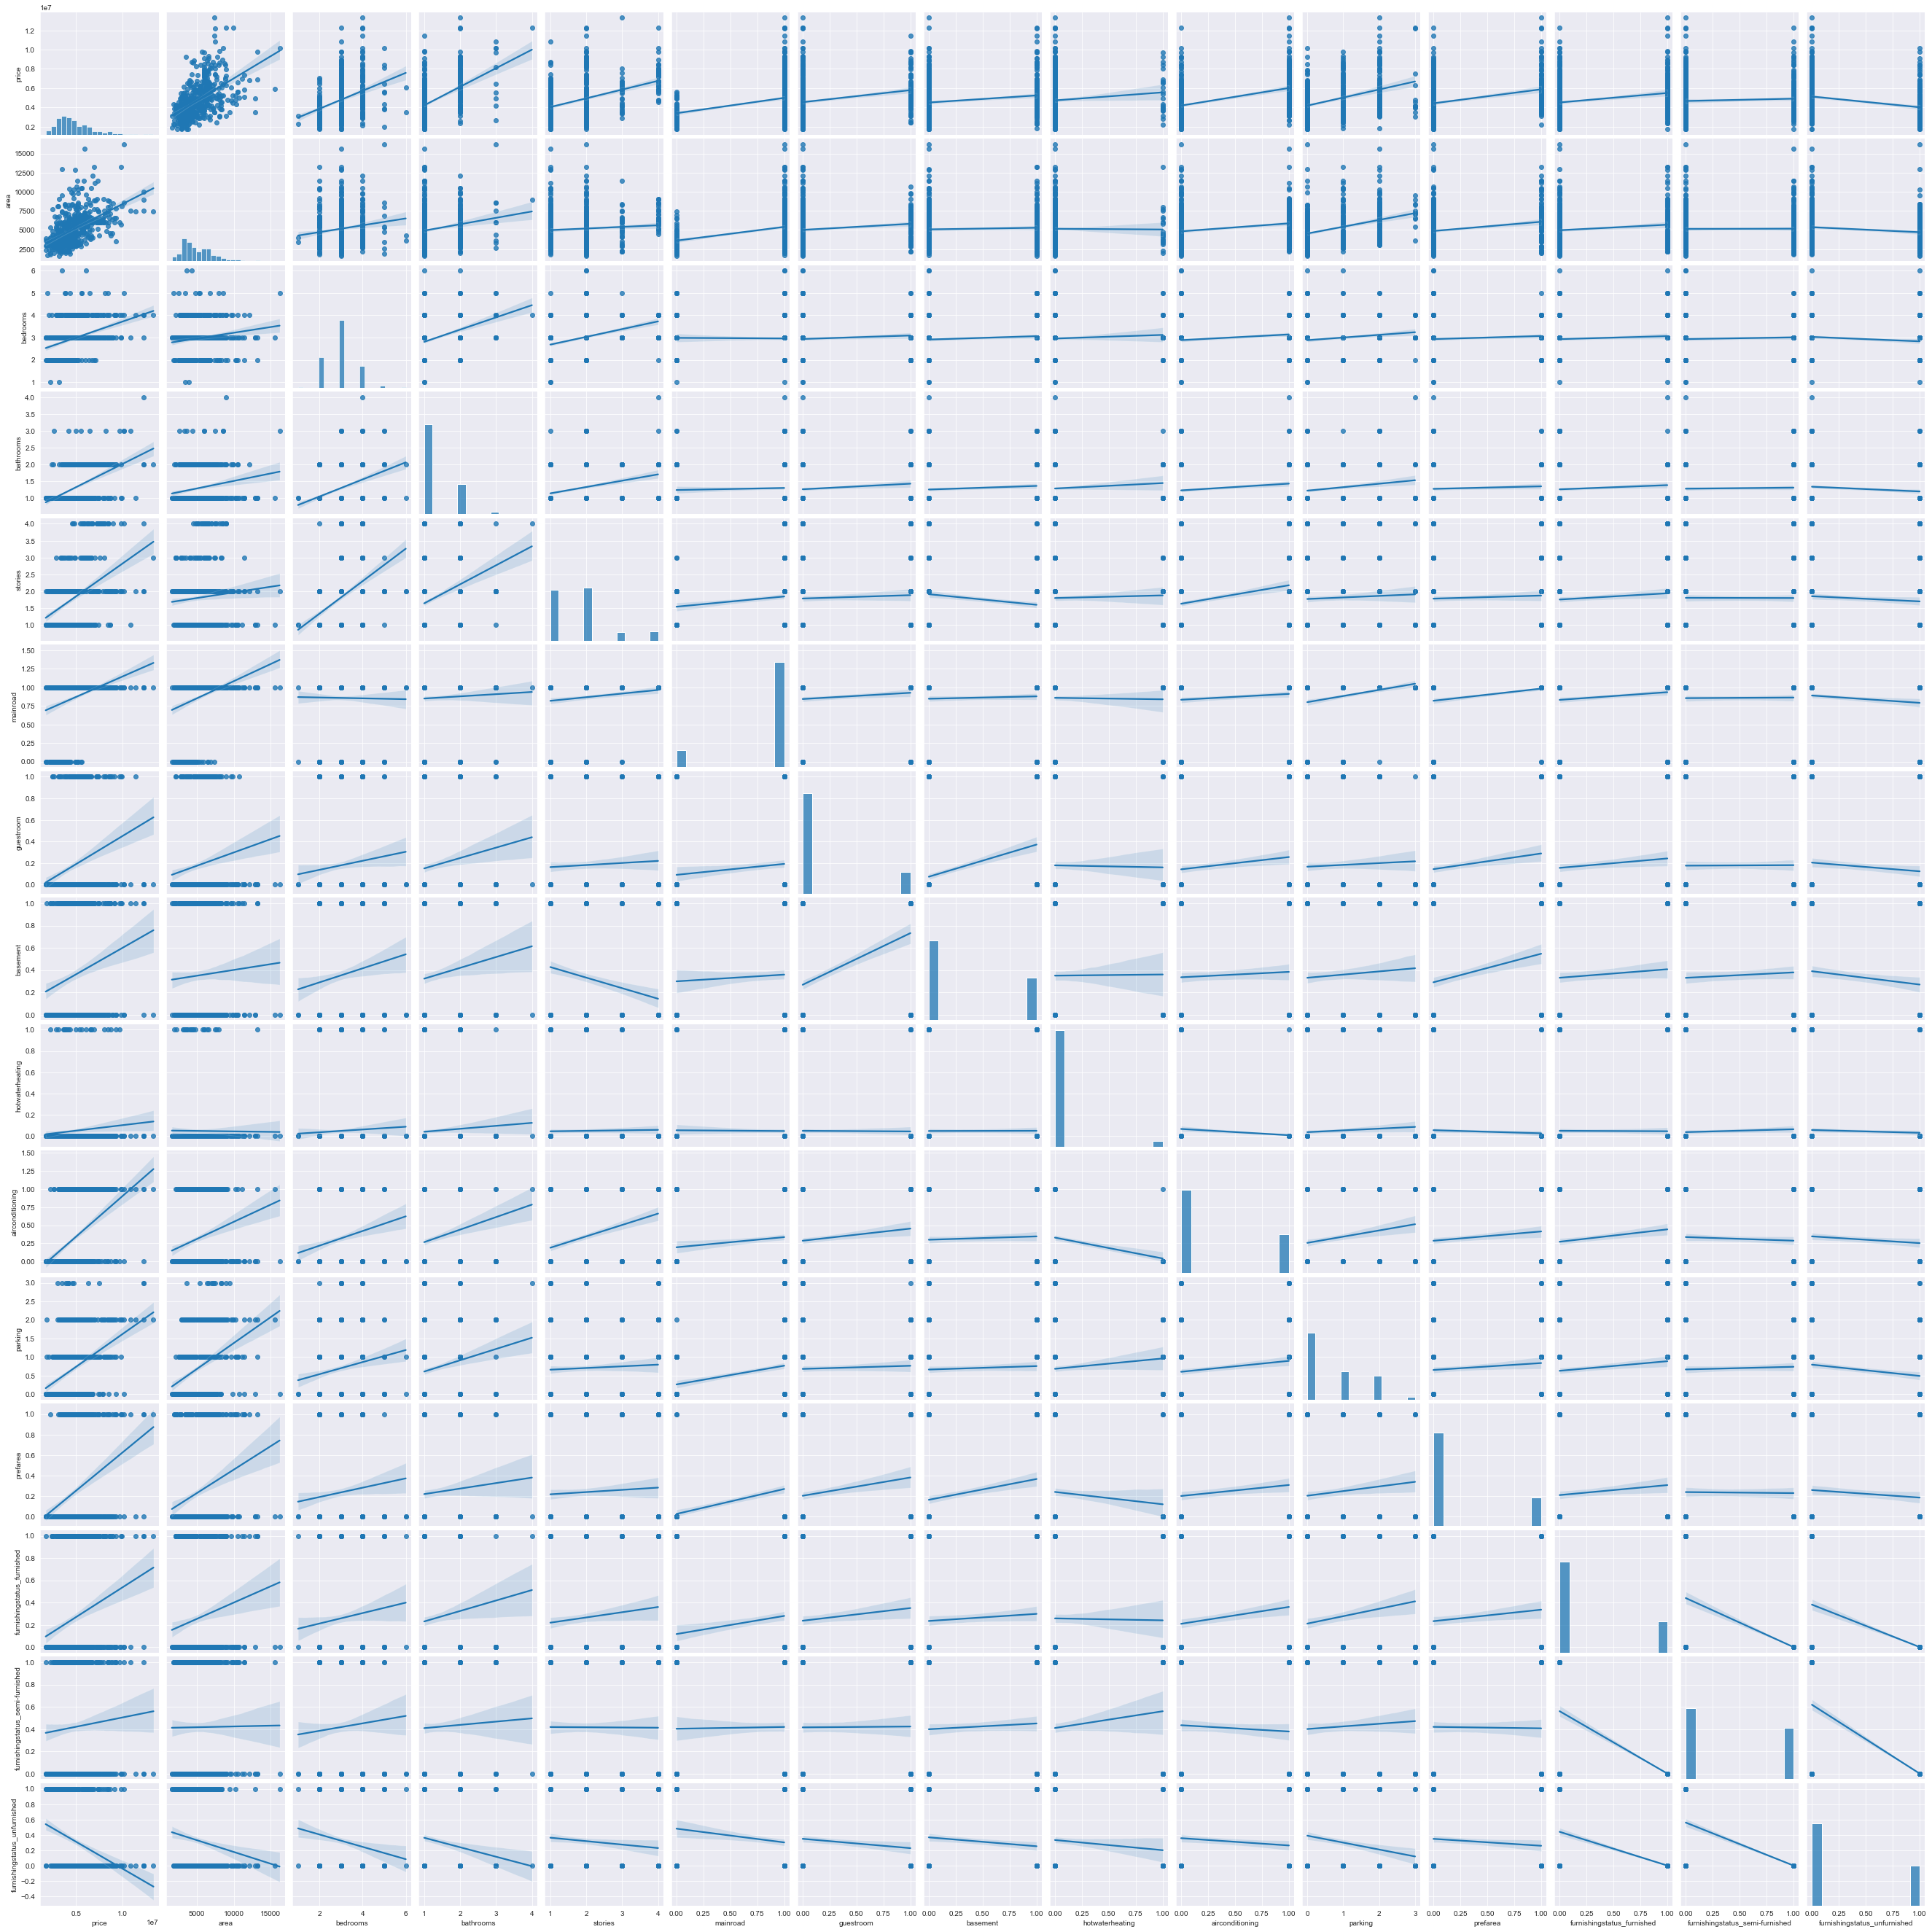

In [48]:
sns.pairplot(df, palette='bright', kind="reg")

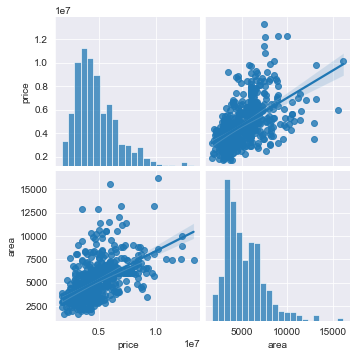

In [49]:
sns.pairplot(df[['price', 'area']], palette='bright', kind="reg")

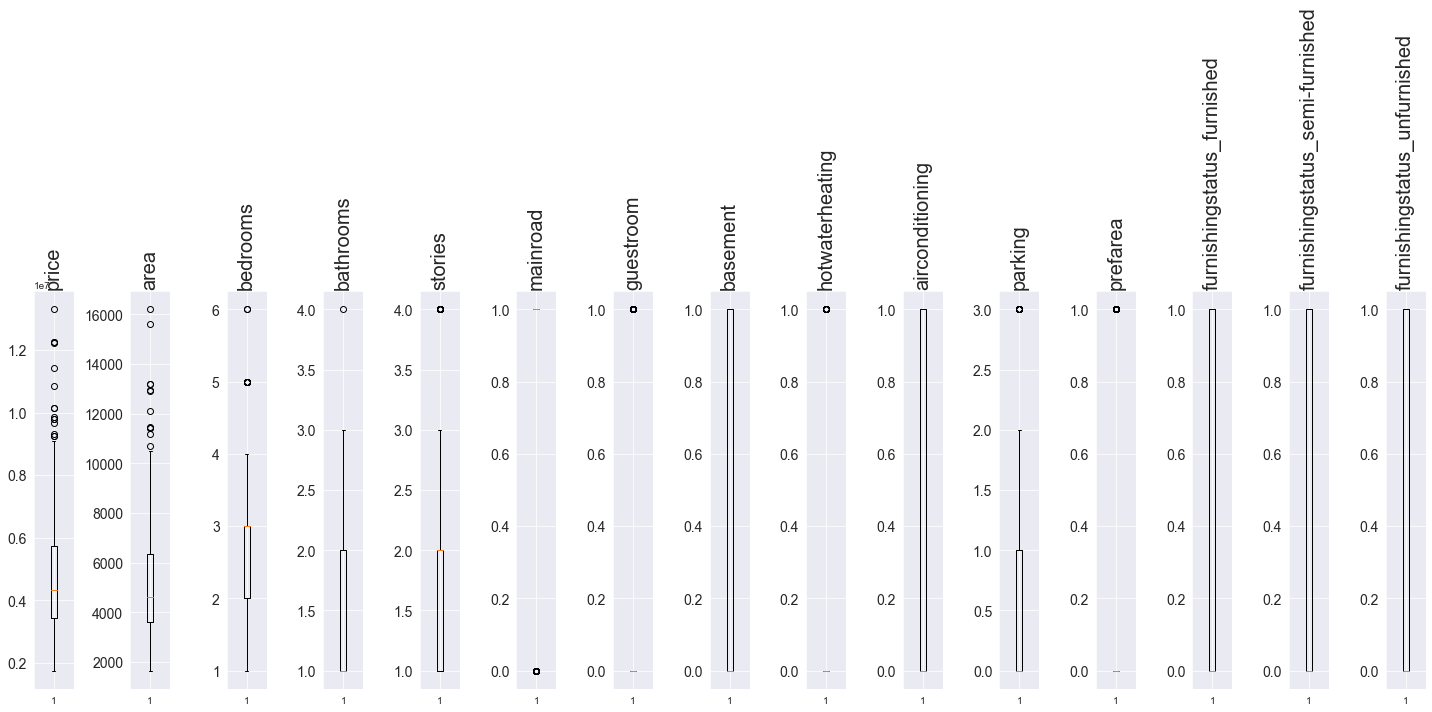

In [50]:
fig, axs = plt.subplots(1, len(df.columns), figsize=(20,10))

for i, ax in enumerate(axs.flat):
    ax.boxplot(df.iloc[:,i])
    ax.set_title(df.columns[i], fontsize=20, rotation=90)
    ax.tick_params(axis='y', labelsize=14)
    
plt.tight_layout()

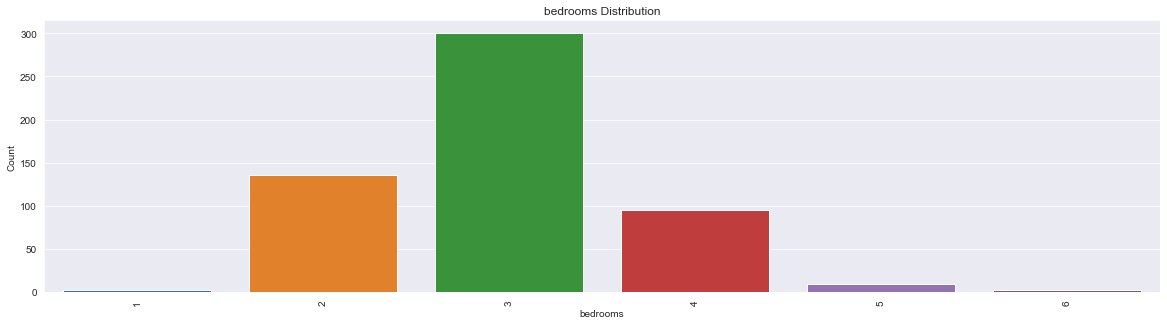

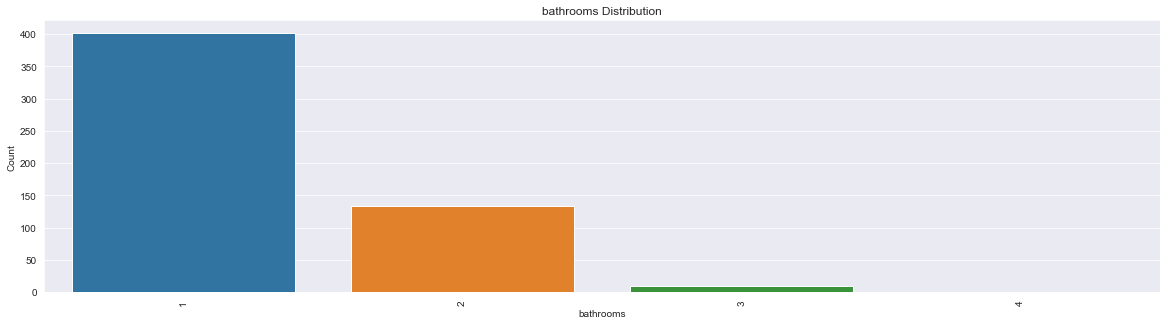

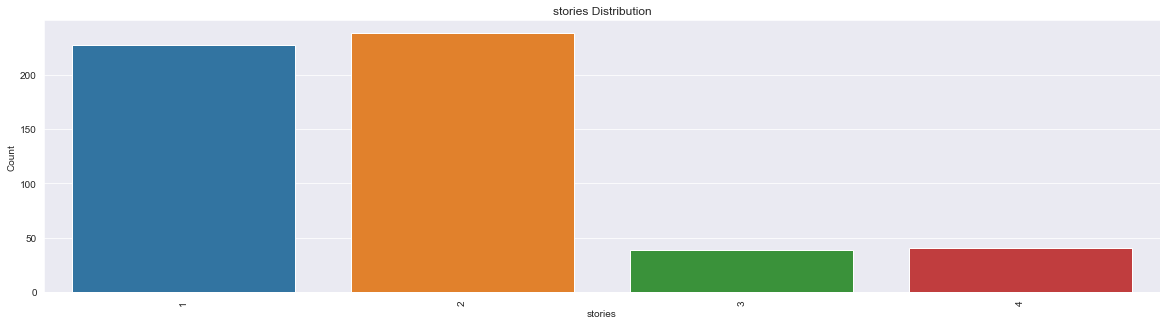

In [51]:
l=['bedrooms','bathrooms','stories']
for i in l:
    plt.figure(figsize=(20,5))
    sns.set_style(style='darkgrid')
    sns.countplot(data=df,x=i)
    plt.title(i + ' Distribution')
    plt.xlabel(i)
    plt.ylabel("Count")
    plt.xticks(rotation=90)
    plt.show()

In [52]:
df.corr()["price"].sort_values(ascending=False).to_frame()

,price
price,1.000000
area,0.535997
bathrooms,0.517545
airconditioning,0.452954
stories,0.420712
parking,0.384394
bedrooms,0.366494
prefarea,0.329777
mainroad,0.296898
guestroom,0.255517


In [53]:
c=['area','bathrooms','airconditioning','stories','parking','bedrooms','prefarea']
for i in c:
    print(df[['area','bedrooms','bathrooms','stories','mainroad','guestroom','basement']])

     area  bedrooms  bathrooms  stories  mainroad  guestroom  basement
0    7420         4          2        3         1          0         0
1    8960         4          4        4         1          0         0
2    9960         3          2        2         1          0         1
3    7500         4          2        2         1          0         1
4    7420         4          1        2         1          1         1
..    ...       ...        ...      ...       ...        ...       ...
540  3000         2          1        1         1          0         1
541  2400         3          1        1         0          0         0
542  3620         2          1        1         1          0         0
543  2910         3          1        1         0          0         0
544  3850         3          1        2         1          0         0

[545 rows x 7 columns]
     area  bedrooms  bathrooms  stories  mainroad  guestroom  basement
0    7420         4          2        3         1    

<AxesSubplot:xlabel='area', ylabel='price'>

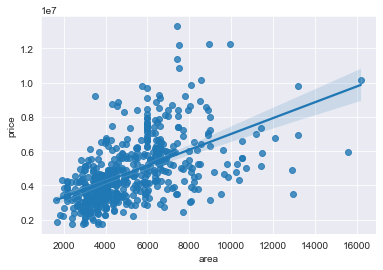

In [54]:
sns.regplot(x='area', y='price', data=df)

In [55]:
x = df.drop('price', axis = 1)
y = df['price']
x.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,7420,4,2,3,1,0,0,0,1,2,1,1,0,0
1,8960,4,4,4,1,0,0,0,1,3,0,1,0,0
2,9960,3,2,2,1,0,1,0,0,2,1,0,1,0
3,7500,4,2,2,1,0,1,0,1,3,1,1,0,0
4,7420,4,1,2,1,1,1,0,1,2,0,1,0,0


In [56]:
y.head()

0    13300000
1    12250000
2    12250000
3    12215000
4    11410000
Name: price, dtype: int64

# Model training 

In [57]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 101)

In [58]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [59]:
print(f"""
Shape of X Train: {x_train.shape}
Shape of Y Train: {y_train.shape}
Shape of X Test:  {x_test.shape}
Shape of Y Test:  {y_test.shape}
""")


Shape of X Train: (381, 14)
Shape of Y Train: (381,)
Shape of X Test:  (164, 14)
Shape of Y Test:  (164,)



In [60]:
linear_reg= LinearRegression()
linear_reg.fit(x_train, y_train)

LinearRegression()

In [61]:
linear_reg_mod=linear_reg.fit(x_train, y_train)
y_train_pred = linear_reg_mod.predict(x_train)
y_train_pred = pd.DataFrame(y_train_pred)

In [62]:
R2 = metrics.r2_score(y_train , y_train_pred)
MAE = metrics.mean_absolute_error(y_train , y_train_pred)
MSE = metrics.mean_squared_error(y_train , y_train_pred)
RMSE = np.sqrt(MSE)
pd.DataFrame([R2, MAE, MSE, RMSE], index=['R2 Score', 'MAE', 'MSE', 'RMSE'], columns=['Training Scores'])

,Training Scores
R2 Score,7.034055e-01
MAE,7.669571e+05
MSE,1.063214e+12
RMSE,1.031123e+06


In [63]:
y_pred = linear_reg_mod.predict(x_test)
y_pred = pd.DataFrame(y_pred)
R2 = metrics.r2_score(y_test , y_pred)
MAE = metrics.mean_absolute_error(y_test, y_pred)
MSE = metrics.mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)
pd.DataFrame([R2, MAE, MSE, RMSE], index=['R2 Score', 'MAE', 'MSE', 'RMSE'], columns=['Testing Scores'])

,Testing Scores
R2 Score,6.132234e-01
MAE,8.167798e+05
MSE,1.262096e+12
RMSE,1.123431e+06


In [64]:
Prediction = {'Actual Price' : np.array(y_test), 
            'Predicted Price' : np.array(y_pred).flatten()
           }

Prediction = pd.DataFrame(Prediction)
print('Prediction using Linear Regression Model')
Prediction.head(10)

Prediction using Linear Regression Model


,Actual Price,Predicted Price
0,4753000,5.441065e+06
1,8890000,6.237737e+06
2,7455000,4.902441e+06
3,3773000,4.853289e+06
4,3780000,4.695593e+06
5,3703000,3.431977e+06
6,7910000,7.288361e+06
7,3500000,3.243561e+06
8,4098500,4.992553e+06
9,5250000,5.830185e+06


Text(0, 0.5, 'y_pred')

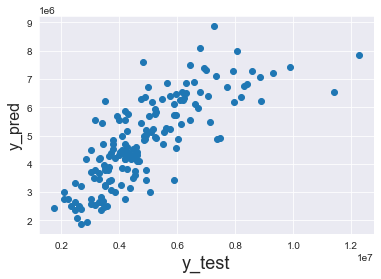

In [65]:
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              
plt.xlabel('y_test', fontsize=18)                          
plt.ylabel('y_pred', fontsize=16) 

# Lasso Regression

In [66]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=1.0)
lasso.fit(x_train, y_train)
y_train_pred = lasso.predict(x_train)
y_train_pred = pd.DataFrame(y_train_pred)
R2 = metrics.r2_score(y_train , y_train_pred)
MAE = metrics.mean_absolute_error(y_train , y_train_pred)
MSE = metrics.mean_squared_error(y_train , y_train_pred)
RMSE = np.sqrt(MSE)
pd.DataFrame([R2, MAE, MSE, RMSE], index=['R2 Score', 'MAE', 'MSE', 'RMSE'], columns=['Training Scores'])

,Training Scores
R2 Score,7.034437e-01
MAE,7.674974e+05
MSE,1.063077e+12
RMSE,1.031056e+06


In [67]:
y_pred = lasso.predict(x_test)
y_pred = pd.DataFrame(y_pred)
R2 = metrics.r2_score(y_test , y_pred)
MAE = metrics.mean_absolute_error(y_test, y_pred)
MSE = metrics.mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)
pd.DataFrame([R2, MAE, MSE, RMSE], index=['R2 Score', 'MAE', 'MSE', 'RMSE'], columns=['Testing Scores'])

,Testing Scores
R2 Score,6.125157e-01
MAE,8.177625e+05
MSE,1.264406e+12
RMSE,1.124458e+06


In [68]:
Prediction = {'Actual Price' : np.array(y_test), 
            'Predicted Price' : np.array(y_pred).flatten()
           }

Prediction = pd.DataFrame(Prediction)
print('Prediction using LASSO Regression Model')
Prediction.head()

Prediction using LASSO Regression Model


,Actual Price,Predicted Price
0,4753000,5.436159e+06
1,8890000,6.233443e+06
2,7455000,4.911600e+06
3,3773000,4.861756e+06
4,3780000,4.681151e+06


In [69]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=0.5)
ridge.fit(x_train, y_train)
y_train_pred = ridge.predict(x_train)
y_train_pred = pd.DataFrame(y_train_pred)
R2 = metrics.r2_score(y_train , y_train_pred)
MAE = metrics.mean_absolute_error(y_train , y_train_pred)
MSE = metrics.mean_squared_error(y_train , y_train_pred)
RMSE = np.sqrt(MSE)
pd.DataFrame([R2, MAE, MSE, RMSE], index=['R2 Score', 'MAE', 'MSE', 'RMSE'], columns=['Training Scores'])

,Training Scores
R2 Score,7.034433e-01
MAE,7.674491e+05
MSE,1.063079e+12
RMSE,1.031057e+06


In [70]:
y_pred = ridge.predict(x_test)
y_pred = pd.DataFrame(y_pred)
R2 = metrics.r2_score(y_test , y_pred).round(5)
MAE = metrics.mean_absolute_error(y_test, y_pred).round(2)
MSE = metrics.mean_squared_error(y_test, y_pred).round(2)
RMSE = np.sqrt(MSE).round(2)
pd.DataFrame([R2, MAE, MSE, RMSE], index=['R2 Score', 'MAE', 'MSE', 'RMSE'], columns=['Testing Scores'])

,Testing Scores
R2 Score,6.126500e-01
MAE,8.174868e+05
MSE,1.263980e+12
RMSE,1.124268e+06


In [71]:
Prediction = {'Actual Price' : np.array(y_test), 
            'Predicted Price' : np.array(y_pred).flatten().round(2)
           }

Prediction = pd.DataFrame(Prediction)
print('Prediction using Ridge Regression Model')
Prediction.head()

Prediction using Ridge Regression Model


,Actual Price,Predicted Price
0,4753000,5435779.48
1,8890000,6234102.57
2,7455000,4910830.01
3,3773000,4862411.90
4,3780000,4680156.29


# Random Forest Regression

In [73]:
from sklearn.ensemble import RandomForestRegressor
RFRmodel = RandomForestRegressor(n_estimators=100,max_depth = 10, min_samples_split=10,random_state=42,criterion='mse')
RFRmodel.fit(x_train,y_train)
y_train_pred = RFRmodel.predict(x_train)
y_test_pred = RFRmodel.predict(x_test)
R2 = metrics.r2_score(y_train , y_train_pred)
MAE = metrics.mean_absolute_error(y_train , y_train_pred)
MSE = metrics.mean_squared_error(y_train , y_train_pred)
RMSE = np.sqrt(MSE)
pd.DataFrame([R2, MAE, MSE, RMSE], index=['R2 Score', 'MAE', 'MSE', 'RMSE'], columns=['Training Scores'])

,Training Scores
R2 Score,8.432278e-01
MAE,5.335769e+05
MSE,5.619875e+11
RMSE,7.496583e+05


In [74]:
R2 = metrics.r2_score(y_test , y_test_pred)
MAE = metrics.mean_absolute_error(y_test, y_test_pred)
MSE = metrics.mean_squared_error(y_test, y_test_pred)
RMSE = np.sqrt(MSE)
pd.DataFrame([R2, MAE, MSE, RMSE], index=['R2 Score', 'MAE', 'MSE', 'RMSE'], columns=['Testing Scores'])

,Testing Scores
R2 Score,5.915844e-01
MAE,8.158596e+05
MSE,1.332707e+12
RMSE,1.154429e+06


# KNN Regression

In [75]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()
knn.fit(x_train,y_train)
y_train_pred = knn.predict(x_train)
y_test_pred = knn.predict(x_test)
R2 = metrics.r2_score(y_train , y_train_pred)
MAE = metrics.mean_absolute_error(y_train , y_train_pred)
MSE = metrics.mean_squared_error(y_train , y_train_pred)
RMSE = np.sqrt(MSE)
pd.DataFrame([R2, MAE, MSE, RMSE], index=['R2 Score', 'MAE', 'MSE', 'RMSE'], columns=['Training Scores'])

,Training Scores
R2 Score,7.443744e-01
MAE,6.609052e+05
MSE,9.163513e+11
RMSE,9.572624e+05


In [76]:
R2 = metrics.r2_score(y_test , y_test_pred)
MAE = metrics.mean_absolute_error(y_test, y_test_pred)
MSE = metrics.mean_squared_error(y_test, y_test_pred)
RMSE = np.sqrt(MSE)
pd.DataFrame([R2, MAE, MSE, RMSE], index=['R2 Score', 'MAE', 'MSE', 'RMSE'], columns=['Testing Scores'])

,Testing Scores
R2 Score,5.369931e-01
MAE,8.825766e+05
MSE,1.510844e+12
RMSE,1.229164e+06


# Evaluation Model

In [77]:
linear_reg_mod.intercept_

4726312.869868528

In [78]:
linear_reg_mod.coef_

array([5.74613452e+05, 7.32007350e+04, 4.80293454e+05, 4.21306891e+05,
       1.51600919e+05, 3.38662867e+04, 1.89773241e+05, 2.27884307e+05,
       3.94695634e+05, 2.50517450e+05, 2.90043201e+05, 1.49959039e+19,
       1.66204871e+19, 1.59017693e+19])

# Model

In [79]:
from joblib import dump
dump(linear_reg_mod , 'ipa.pkl')

['ipa.pkl']